# <center> Data Analytics Case: School Attendance metrics<center>

**Project:**
Data Analytics Case Study

**Author:**
Heber Mauro Ttito Chara

**Last modification:**
2023.01.13


<hr style="height:2px;border-width:0;color:black;background-color:black">

## 0. Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Data cleaning

In [2]:
#Import data
df_attendance=pd.read_excel('Case_Study_-_Student_Absence_-_2022-2023_-_Oct_-_Nov.xlsx', index_col=None)
df_enrollment=pd.read_excel('Case_Study_-_Student_Enrollment.xlsx', index_col=None, usecols="B:C")

In [3]:
df_attendance.head()

,Student ID,Student,Institution,Date,Attendance Per Day,Subjects,Absence Type,Institution Class,Education Grade,Gender
0,83W2407401136T,Reyon,Angola,14-09-2022,NaN,Civics - 11G,NaN,Grade 11-G - Thurston & Wright,Grade 11,Male
1,83W2407401136T,Reyon,Angola,22-09-2022,NaN,English Language- Gibson/K. Cooper,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male
2,83W2407401136T,Reyon,Angola,04-10-2022,Period 1 (Morning),NaN,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male
3,83W2407401136T,Reyon,Angola,04-10-2022,Period 2 (Afternoon),NaN,Absence - Unexcused,Grade 11-G - Thurston & Wright,Grade 11,Male
4,83W2407401136T,Reyon,Angola,04-10-2022,NaN,Mathematics- Daniels,Absence - Excused,Grade 11-G - Thurston & Wright,Grade 11,Male


In [4]:
df_enrollment.head()

,Enrollment,Unnamed: 2
0,Jamaica,887
1,Malaui,135
2,Mauricio,483
3,Guinea,1230
4,Yemen,53


In [5]:
#Rename columns
df_enrollment.rename(columns={'Enrollment': 'Institution', 'Unnamed: 2': 'Enrollment'}, inplace=True)

In [6]:
#Checking variables and null values
df_attendance.info()
df_enrollment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173106 entries, 0 to 173105
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Student ID          173106 non-null  object
 1   Student             173106 non-null  object
 2   Institution         173052 non-null  object
 3   Date                173106 non-null  object
 4   Attendance Per Day  65155 non-null   object
 5   Subjects            97415 non-null   object
 6   Absence Type        136352 non-null  object
 7   Institution Class   173027 non-null  object
 8   Education Grade     173106 non-null  object
 9   Gender              173106 non-null  object
dtypes: object(10)
memory usage: 13.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Institution  54 non-null     object
 1   Enrollment   54 non-null     

The variables Institution, Data, Attendance Per Day, Subjects, Absence Type, and Institution Class have nulls values

It is noted that the date variable must be in date format and not in object format.

In [7]:
# Change the format of 'Date' column
df_attendance['Date']= pd.to_datetime(df_attendance['Date'])
print(df_attendance['Date'].dtypes)


datetime64[ns]


### Variables analysis

**The spreadsheets did not came with a dictionary.** 

The variables will be analyzed in order to understand each one and their relationship with each other.

**Recommendation**: The Ministry of Education should provide dictionaries of the databases because our interpretation could be inaccurate.  

#### Analyzing the enrollment

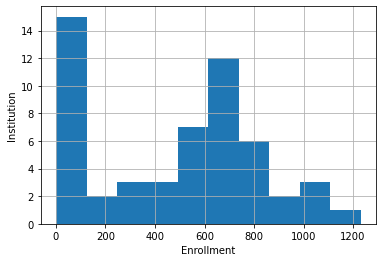

In [13]:
# Analyzing the enrollment
df_enrollment['Enrollment'].hist(bins=10) 
plt.xlabel("Enrollment")
plt.ylabel("Institution")
plt.rcParams['figure.figsize'] = [5,5] 
plt.show()

In [14]:
# Analyzing some statistics of enrollment
df_enrollment.describe().T.apply(lambda s: s.apply('{0:.2f}'.format))

,count,mean,std,min,25%,50%,75%,max
Enrollment,54.00,481.61,346.94,1.00,70.75,539.00,722.75,1230.00


In [15]:
# A categorical variable is created to deepen the analysis of attendance.
df_enrollment['School_size'] = pd.cut(x=df_enrollment['Enrollment'], bins=[0, 500, 1230], 
                                labels=['small institution','non-small institution'])

In [17]:
df_enrollment.head()

,Institution,Enrollment,School_size
0,Jamaica,887,non-small institution
1,Malaui,135,small institution
2,Mauricio,483,small institution
3,Guinea,1230,non-small institution
4,Yemen,53,small institution


The enrollment database needs to have cut-off date information. If the data needs to be updated, more or fewer students could be enrolled since enrollment is not constant. Outdated information could affect the estimation of attendance ratios.

**Recommendation**: Include the information's cut-off date, which should be close to the attendance information.

#### Analyzing the attendance

In [8]:
#Summary of attendance variables
df_attendance.describe()

C:\Users\COORDI~1\AppData\Local\Temp/ipykernel_15476/1503815828.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_attendance.describe()


,Student ID,Student,Institution,Date,Attendance Per Day,Subjects,Absence Type,Institution Class,Education Grade,Gender
count,173106,173106,173052,173106,65155,97415,136352,173027,173106,173106
unique,38665,21359,146,85,2,3949,3,1134,28,2
top,83W1601496548T,Shaon,Senegal,2022-08-29 00:00:00,Period 1 (Morning),Grammar and Usage,Absence - Unexcused,Grade 7-A,Grade 8,Male
freq,16,411,8112,11639,33092,3177,102647,2193,22355,87188
first,NaN,NaN,NaN,2022-01-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2023-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_attendance['Institution'].value_counts()

In [ ]:
#Values of Attendance per day
df_attendance['Attendance Per Day'].value_counts()

In [ ]:
#Values of Absence Type
df_attendance['Absence Type'].value_counts()

In [ ]:
#Values of Gender
df_attendance['Gender'].value_counts()

**Attendance dictionary created from observation:**

Student ID: ID code that identifies a student.

Student: First name of the student.

Institution: The institution's name, in this case, is based on the name of the countries.

Date: Date of attendance record.

Attendance Per Day: Attendance period in morning (period 1) or afternoon (period 2).

Subjects: The subject matter of the attendance record.

Absence Type: Type of absence excused or unexcused.

Institution Class: name of student's class or section including grade level

Education Grade: Student's educational level.

Gender: Gender of the student (Male or Female).

**Enrollment dictionary created from observation:**

Institution: The institution's name, in this case, is based on the name of the countries. (Will be use to merge dataframes)

Enrollment: The number of students enrolled.

## 2. Diagnosis of the country’s current attendance and attendance rates

You must explain your calculation methods.

## 3. Assessment of the country’s current attendance and attendance rates evolution

Include some hypotheses to explain the country’s attendance and attendance trends and justify them using descriptive methods.

## 4. Estimated attendance and attendance trajectory

Justify the methodology used in the estimation and specify the bias assumed with the methodology chosen and justify the choice.
